# Creando un Bot para la empresa

# Cargar api_key de .env

In [1]:
from dotenv import load_dotenv , find_dotenv
load_dotenv(find_dotenv())

True

## Importar openai y crear un cliente

In [2]:
import openai

In [3]:
cliente = openai.Client()

Ver los modelos disponibles para usar

In [4]:
for modelo in cliente.models.list().data:
    print(modelo.id)

dall-e-3
gpt-4-1106-preview
dall-e-2
tts-1-hd-1106
tts-1-hd
gpt-4o-mini-2024-07-18
gpt-4-0125-preview
babbage-002
gpt-4-turbo-preview
text-embedding-3-small
text-embedding-3-large
tts-1
gpt-3.5-turbo
whisper-1
gpt-4o-2024-05-13
text-embedding-ada-002
gpt-3.5-turbo-16k
davinci-002
gpt-4-turbo-2024-04-09
tts-1-1106
gpt-3.5-turbo-0125
gpt-4-turbo
gpt-3.5-turbo-1106
gpt-4o-mini
gpt-4o
gpt-3.5-turbo-instruct-0914
gpt-3.5-turbo-instruct
gpt-4-0613
gpt-4


## Algunas bibliotecas para leer documentos

Documentos genericos o creados por el usuario

In [5]:
from langchain_core.documents import Document

In [6]:
texto = "documento de langchain generico "
metadata = {"origen": "creado en en clase"}
doc = Document(page_content=texto,
               metadata=metadata)

In [7]:
doc

Document(page_content='documento de langchain generico ', metadata={'origen': 'creado en en clase'})

Lectores de Documentos mas comunes

In [8]:
# from langchain_community.document_loaders import TextLoader
# from langchain_community.document_loaders import PyPDFLoader
# from langchain_community.document_loaders import Docx2txtLoader
# from langchain_community.document_loaders.csv_loader import CSVLoader

Lector para cargar paginas web y transcripciones de videoa de youtube

In [9]:
# from langchain_community.document_loaders import WebBaseLoader
# from langchain_community.document_loaders import YoutubeLoader

Lectores para documento no estructurados imagens ppts y excels ()

In [10]:
# from langchain_community.document_loaders import UnstructuredImageLoader
# from langchain_community.document_loaders import UnstructuredPowerPointLoader
# from langchain_community.document_loaders import UnstructuredExcelLoader

In [11]:
# from langchain_community.document_loaders import WikipediaLoader

Leer carpeta con documentos

In [12]:
import os

In [13]:
datos = os.listdir("datos")
datos

['ACME FOR DUMMIES - an induction guide.pdf']

Para usar PyPDFLoader nececitamos tener instalado pypdf

In [14]:
from langchain_community.document_loaders import PyPDFLoader

In [15]:
carpeta_actual = os.getcwd()

In [16]:
documentos = []

In [17]:
for doc in datos:
    path = os.path.join(carpeta_actual,"datos", doc)
    pdf = PyPDFLoader(path)
    document = pdf.load()
    documentos.extend(document)

In [18]:
len(documentos)

11

In [19]:
for doc in documentos:
    print(doc.metadata)

{'source': 'e:\\bot-induccion\\datos\\ACME FOR DUMMIES - an induction guide.pdf', 'page': 0}
{'source': 'e:\\bot-induccion\\datos\\ACME FOR DUMMIES - an induction guide.pdf', 'page': 1}
{'source': 'e:\\bot-induccion\\datos\\ACME FOR DUMMIES - an induction guide.pdf', 'page': 2}
{'source': 'e:\\bot-induccion\\datos\\ACME FOR DUMMIES - an induction guide.pdf', 'page': 3}
{'source': 'e:\\bot-induccion\\datos\\ACME FOR DUMMIES - an induction guide.pdf', 'page': 4}
{'source': 'e:\\bot-induccion\\datos\\ACME FOR DUMMIES - an induction guide.pdf', 'page': 5}
{'source': 'e:\\bot-induccion\\datos\\ACME FOR DUMMIES - an induction guide.pdf', 'page': 6}
{'source': 'e:\\bot-induccion\\datos\\ACME FOR DUMMIES - an induction guide.pdf', 'page': 7}
{'source': 'e:\\bot-induccion\\datos\\ACME FOR DUMMIES - an induction guide.pdf', 'page': 8}
{'source': 'e:\\bot-induccion\\datos\\ACME FOR DUMMIES - an induction guide.pdf', 'page': 9}
{'source': 'e:\\bot-induccion\\datos\\ACME FOR DUMMIES - an induction 

In [20]:
print(documentos[1].page_content)

CONFIDENTIAL – FOR INTERNAL USE ONLY - DO NOT DISTRIBUTE - CONFIDENTIAL – FOR INTERNAL USE ONLY - DO NOT DISTRIBUTE  
CONFIDENTIAL – FOR INTERNAL USE ONLY - DO NOT DISTRIBUTE - CONFIDENTIAL – FOR INTERNAL USE ONLY - DO NOT DISTRIBUTE  2   
Thank you for reviewing this document! We would like 
to consider this a “Dummy” guide to ACME .  
You will learn about the company structure, marketing 
activities, sales operations, and about project execution 
and related special processes.  
The aim of this presentation is to give you an overview 
of the operations that are taking place at ACME , how 
they are being executed and by whom.  
 
ABBREVIATIONS  AND ACRONYMS   
  
 
First we will start with some 
basic jargon. You may notice 
that, throughout the 
presentation to follow, many 
roles in the company will be 
referred to by the common 
abbreviations used internally. 
Please use this chart to 
identify the individuals 
referred to, as needed.  
  



El pdf tiene varias imagenes con datos que el lector no captura esa informacion
Vamos a extraer las imagenes y tratar de hacer un ocr

In [21]:
# pip install pymupdf

import fitz  # PyMuPDF

# Abre el PDF
pdf_document = "./datos/ACME FOR DUMMIES - an induction guide.pdf"
pdf = fitz.open(pdf_document)

# Extrae las imágenes
for page_index in range(len(pdf)):
    page = pdf.load_page(page_index)
    images = page.get_images(full=True)
    for img_index, img in enumerate(images):
        xref = img[0]
        base_image = pdf.extract_image(xref)
        image_bytes = base_image["image"]
        image_ext = base_image["ext"]
        image_filename = f"pagina{page_index+1}_imagen{img_index+1}.{image_ext}"
        path = os.path.join(carpeta_actual, "datos", image_filename)
        # Guarda la imagen
        with open(path, "wb") as img_file:
            img_file.write(image_bytes)

print("Imágenes extraídas y guardadas.")

Imágenes extraídas y guardadas.


Para usar la clase UnstructuredImageLoader hay que instalar

el ocr testerac de : 

https://tesseract-ocr.github.io/tessdoc/Installation.html

https://github.com/UB-Mannheim/tesseract/wiki

instalador para windows

https://github.com/UB-Mannheim/tesseract/releases/download/v5.4.0.20240606/tesseract-ocr-w64-setup-5.4.0.20240606.exe

y las librerias de python 

- pytesseract
- unstructured
- unstructured-client



In [22]:
from langchain_community.document_loaders import UnstructuredImageLoader

In [23]:
imagenes = []

lo siguiente puede tardar uno minutos

In [24]:
for imagen in os.listdir("datos"):
    nombre, extension = os.path.splitext(imagen)
    if extension in {".jpeg", ".jpg", ".png"}:
        path = os.path.join(carpeta_actual, "datos", imagen)
        img = UnstructuredImageLoader(path)
        document = img.load()
        imagenes.extend(document)
        

This function will be deprecated in a future release and `unstructured` will simply use the DEFAULT_MODEL from `unstructured_inference.model.base` to set default model name
This function will be deprecated in a future release and `unstructured` will simply use the DEFAULT_MODEL from `unstructured_inference.model.base` to set default model name
This function will be deprecated in a future release and `unstructured` will simply use the DEFAULT_MODEL from `unstructured_inference.model.base` to set default model name
This function will be deprecated in a future release and `unstructured` will simply use the DEFAULT_MODEL from `unstructured_inference.model.base` to set default model name
This function will be deprecated in a future release and `unstructured` will simply use the DEFAULT_MODEL from `unstructured_inference.model.base` to set default model name
This function will be deprecated in a future release and `unstructured` will simply use the DEFAULT_MODEL from `unstructured_inference.

In [25]:
len(imagenes)

14

In [26]:
from IPython.display import display, Image

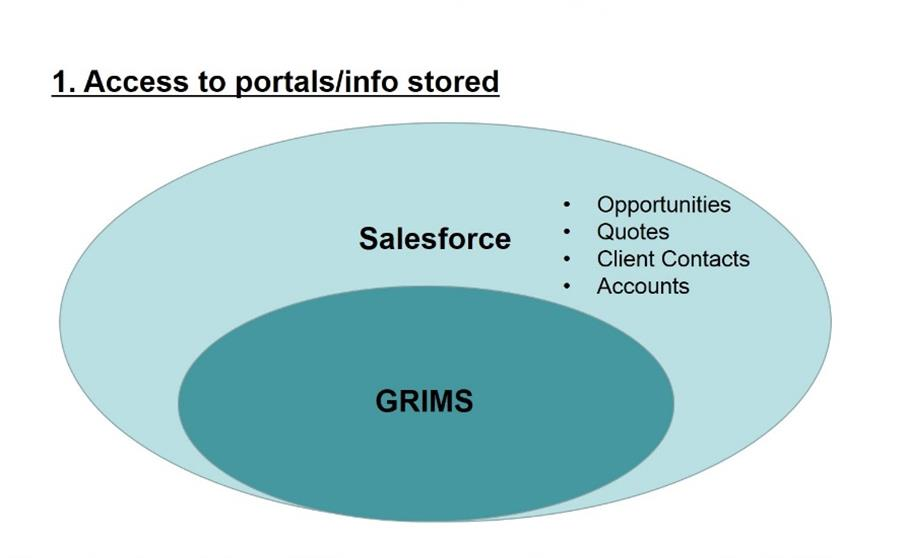

1. Access to portals/info stored

Opportunities Quotes Client Contacts Accounts Salesforce . .
{'source': 'e:\\bot-induccion\\datos\\pagina3_imagen1.jpeg'}


In [57]:
url_imagen = imagenes[5].metadata["source"]
display(Image(url_imagen))
print(imagenes[5].page_content)
print(imagenes[5].metadata)

In [29]:
doc_a_vectorizar = []

In [30]:
doc_a_vectorizar.extend(documentos)
doc_a_vectorizar.extend(imagenes)

In [31]:
len(doc_a_vectorizar)

25

## Fraccionar Documetos 

Para mejorar la búsqueda semántica, podemos utilizar la estrategia de dividir los documentos en fragmentos. Esto es particularmente útil cuando los documentos contienen información variada que podría confundir la búsqueda semántica. Al dividir los documentos en fragmentos más pequeños y coherentes, podemos mejorar la precisión de las búsquedas, ya que cada fragmento contendrá un conjunto más concentrado de información relevante.

### Razones para Dividir Documentos:

- Claridad y Relevancia:

> Los documentos largos pueden cubrir múltiples temas. Dividirlos en fragmentos permite que cada sección trate sobre un tema específico, lo que mejora la precisión de las búsquedas.
Reducción de Ruido:

> La información irrelevante en documentos largos puede afectar negativamente la búsqueda semántica. Fragmentar los documentos reduce el ruido y mejora la calidad de los resultados de búsqueda.
Mejora en el Rendimiento:

> Las búsquedas en fragmentos más pequeños pueden ser más rápidas y eficientes, especialmente cuando se utilizan modelos de procesamiento de lenguaje natural (NLP) y embeddings.

Vamos a utilizar  

 `RecursiveCharacterTextSplitter` es una herramienta útil de la biblioteca LangChain para dividir textos largos en fragmentos más pequeños de manera jerárquica, respetando los límites de palabras, oraciones, párrafos y secciones de manera recursiva. Esto es especialmente útil para preparar documentos para tareas de búsqueda semántica o procesamiento de lenguaje natural.

Funcionalidad de RecursiveCharacterTextSplitter

- Jerárquico:

> Divide el texto de manera recursiva siguiendo una jerarquía de delimitadores. Por ejemplo, puede intentar dividir primero por párrafos, luego por oraciones, y finalmente por palabras si es necesario.

- Configuración de Longitud:

> Permite especificar la longitud máxima de los fragmentos en términos de caracteres, asegurando que cada fragmento no exceda un tamaño determinado.

Parámetros Principales
- chunk_size: 
        Tamaño máximo permitido para cada fragmento en caracteres.
- chunk_overlap: 
        Número de caracteres que se solaparán entre fragmentos consecutivos.
- separators: 
        Lista de delimitadores utilizados para dividir el texto. Estos pueden ser caracteres de nueva línea, espacios, o cualquier otro delimitador personalizado.

In [32]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [33]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 200
)

In [34]:
chunks = text_splitter.split_documents(doc_a_vectorizar)

In [35]:
len(chunks)

52

## Ahora vamos a Vectorizar

Vectorizar un documento usando un embedding para la búsqueda semántica implica transformar el texto en vectores numéricos de alta dimensión que capturan el significado semántico del texto. Estos vectores permiten medir la similitud semántica entre diferentes fragmentos de texto.

Los embeddings capturan relaciones semánticas más profundas que las búsquedas basadas en palabras clave.

In [36]:
from langchain_openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings()
from langchain_community.vectorstores import Chroma

In [37]:
vectordb = Chroma.from_documents(
    documents=chunks, # estos son tus datos partidos
    embedding=embedding, # este es el enmbeding que usas ej : 
    persist_directory="base_bot/", )# directorio donde se guardan los vectores)
vectordb.persist()

In [38]:
datadb    = Chroma(persist_directory="base_bot", 
                       embedding_function=embedding)

In [39]:
datadb._collection.count()

52

In [40]:
from textwrap import fill

In [41]:
def consulta_base(pregunta, k):
    fragmentos = datadb.max_marginal_relevance_search(
        pregunta, 
        k = k,)
    st =""
    for doc in fragmentos:
        st += fill(doc.page_content,80)  + "\n\n"
    return st
    

In [42]:
contexto =consulta_base("como se llama la empresa?", 5)

In [43]:
print(contexto)

Initial Stages: Commercial Operations  2 Webinar  €&o)— Contact is made with
potential client gy PS Quote    |  Licensale Demo  (Ssc)- Identify Needs of
potential client  1  Provide Quote upon request  ws

ARAZY GROUP  R q

CONFIDENTIAL – FOR INTERNAL USE ONLY - DO NOT DISTRIBUTE - CONFIDENTIAL – FOR
INTERNAL USE ONLY - DO NOT DISTRIBUTE   CONFIDENTIAL – FOR INTERNAL USE ONLY -
DO NOT DISTRIBUTE - CONFIDENTIAL – FOR INTERNAL USE ONLY - DO NOT DISTRIBUTE  1
ACME INC

QUALITY MANAGEMENT SYSTEM - ISO 9001:2008  This is to certify that:  Arazy Group
Consultants Inc. 350-1333 Johnston Street Vancouver British Columbia V¥6H 3R6
Canada  Holds Certificate No:  FS 619707  and operates a Quality Management
System which complies with the requirements of ISO 9001:2008 for the following
scope:  Provision of global medical and IVD device regulatory affairs, safety
compliance, quality assurance and licensing consulting services, including local
authorized representative and importation services, thro

In [44]:
system  = """
Eres un experto en la documentación de la empresa, con una habilidad destacada para guiar
a los nuevos empleados a través de la documentación.

Mantén un tono profesional y acogedor, proporcionando respuestas claras y estructuradas. 
Utiliza un formato paso a paso para guiar al usuario a través de la documentación.

En Cada consulta se te dara un CONTEXTO y debes mantener tu respuesta a la informacion del 
CONTEXTO sin agregar ningun conocimiento adicional de tu base de conocimiento como modelo LLM.

Siempe contesta en el idioma de la pregunta sin necesidad que el ususrio te lo pida.
"""

In [45]:
prompt_base = """
El usuario realizo la siguente PREGUNTA:
```{}```

Escriba una respuesta en el idioma de la PREGUNTA basado
el el siguiente CONTEXTO:
```{}```
"""

In [46]:
def chat(pregunta, historial):
    memoria = [{"role":"system", "content":system}]
    
    contexto = consulta_base(pregunta, 5)
    for usuario, bot in historial:
        memoria.append({"role":"user", "content": usuario})
        memoria.append({"role":"assistant", "content": bot})
    memoria.append({"role":"user", "content":prompt_base.format(pregunta, contexto)})
    response = cliente.chat.completions.create(
            model = "gpt-4o-mini",
            messages = memoria,
            temperature = 0.5
   
    )
    return response.choices[0].message.content

In [47]:
chat("cuales es la funcion de un CEO",[])

'La función de un CEO (Chief Executive Officer) en una empresa como ACME es fundamental para la dirección y gestión de la organización. A continuación, se detallan las principales responsabilidades de un CEO:\n\n1. **Visión y Estrategia**: El CEO es responsable de establecer la dirección estratégica de la empresa y de asegurar que todos los departamentos trabajen hacia los mismos objetivos.\n\n2. **Toma de Decisiones**: Toma decisiones clave que afectan a la empresa, incluyendo la asignación de recursos y la priorización de proyectos.\n\n3. **Gestión del Equipo Ejecutivo**: Supervisa a otros altos ejecutivos y asegura que el equipo de liderazgo esté alineado con la visión de la empresa. Esto incluye a roles como COO (Chief Operations Officer) y CRO (Chief Regulatory Officer).\n\n4. **Comunicación**: Actúa como el principal portavoz de la empresa, comunicando la visión y los logros a empleados, clientes, inversores y otros interesados.\n\n5. **Rendimiento Financiero**: Es responsable de

## Creamos una Interfaz de Usuario con gradio

In [48]:
import gradio as gr

In [49]:
iface = gr.ChatInterface(
    fn=chat,
    chatbot=gr.Chatbot(height=300),
    textbox=gr.Textbox(placeholder="Hazme una pregunta", container=False, scale=7),
    title="Chatbot de ACME",
    description="Escribe una pregunta y obtén una respuesta generada por el bot de ACME.")

In [50]:
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
